In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("--- Random Forest Regressor ---")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

--- Random Forest Regressor ---
RMSE: 0.5053
R² Score: 0.8051


In [4]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("--- Gradient Boosting Regressor ---")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")

--- Gradient Boosting Regressor ---
RMSE: 0.5422
R² Score: 0.7756


In [5]:
print("\n--- Model Comparison ---")
print(f"Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"Gradient Boosting - RMSE: {rmse_gb:.4f}, R²: {r2_gb:.4f}")


--- Model Comparison ---
Random Forest - RMSE: 0.5053, R²: 0.8051
Gradient Boosting - RMSE: 0.5422, R²: 0.7756


In [6]:
print("\n--- Feature Importance (Random Forest) ---")
importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df)


--- Feature Importance (Random Forest) ---
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


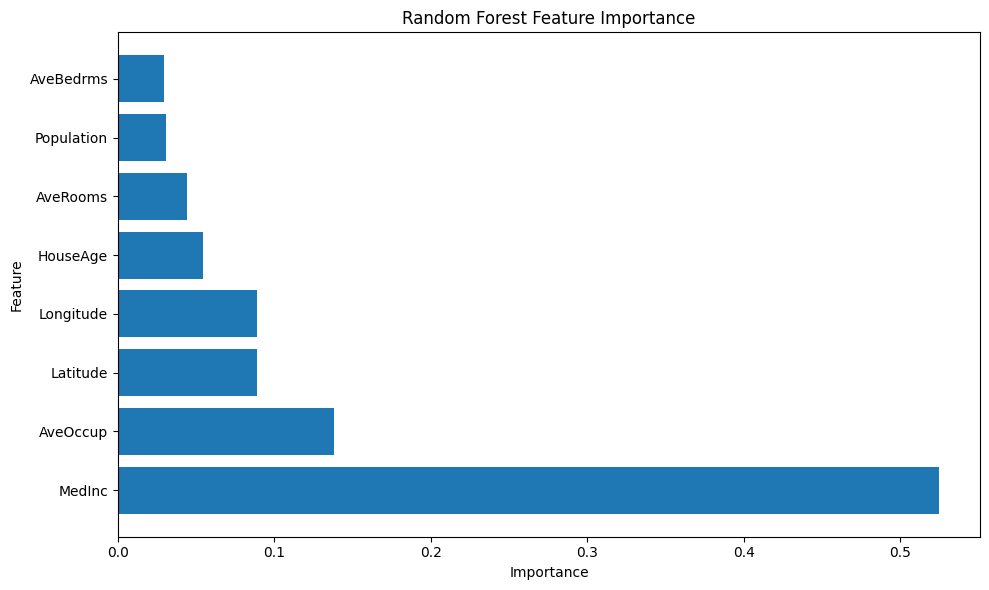

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()